# **Sustainable Development Goals (SDGs) Classifier**

![](https://www.idsa.in/system/files/sdg-un-banner.jpg)

# <a id="contents">Table of Contents</a><br>
1. [**Introduction**](#introduction)
  > 1.1 [**Problem Statement**](#problem_statement) <br>
    1.2 [**Project Objectives**](#project_objective) <br>
    1.3 [**Definition of Data Features**](#data)<br>
    1.4 [**Importing Libraries**](#importing_libraries)<br>
    1.5 [**Loading Data**](#loading_data) <br>
    1.6 [**Initialize Comet**](#comet) <br>
    
2. [**Data Preprocessing**](#preprocessing)
>   2.1 [**Removing Links**](#removing_links)<br>

3. [**Exploratory Data Analysis**](#EDA) <br>
>   3.1 [**Most Frequent Words**](#most_frequent_words)<br>
    3.2 [**Visualisation**](#visualisation)<br>
    3.3 [**Text Analysis**](#text_analysis)<br>
    3.4 [**Class Balance**](#class_balance)<br>
    3.5 [**Feature Engineering**](#feature_engineering)<br>
   
4. [**Modeling**](#model) <br>
    4.1 [**Model Training**](#modeltraining) <br>
    > 4.1.1. [**Model 1**](#model1) <br>
     4.1.2. [**Model 2**](#model2) <br>
     4.1.3. [**Model 3**](#model3) <br>
     
    4.2 [**Mertics Evaluation**](#merticsevaluation) <br>
    
5. [**Conclusion and Recommendation**](#Conclusion/Recommendation) <br>
   > 5.1 [**Conclusion**](#Conclusion) <br>
     5.2 [**Recommendation**](#Recommendation) <br><br>

6. [**References**](#reference) <br>



# 1 <a id="introduction"><strong>INTRODUCTION</strong></a>
[Table of Contents](#contents)<br>

The Sustainable Development Goals (SDGs) were established in 2015 as a blueprint for peace and prosperity for people and the planet, now and into the future. The SDGs must be monitored in order to gauge development and challenges to achieving such common objectives. Teams from the United Nations evaluate streams of SDG-related papers created by governments, academia, business, and public bodies to determine how well each SDG is progressing.
Although UNEP has experts in many domains that can help in evaluating streams of SDG-related papers, connections to the SDGs outside of their areas of expertise may be missed.
so for that reason we , members of team A have been tasked to build an NLP module that would help identify SDGs based on articles fed to the module


## 1.1 <a id="problem_statement"><strong>Problem Statement</strong></a>
[Table of Contents](#contents)<br>


## 1.2 <a id="project_objective"><strong>Project Objectives</strong></a>
[Table of Contents](#contents)<br>

* Clean the dataset so that it may be utilized for model development.

* Create a variety of models to identify the various SDGs.

* Using the provided Test Data, assess the model's accuracy in making predictions.

* Pick the best model for categorizing SDG articles.

## 1.3 <a id="data"><strong>Definition of Data Features</strong></a>
[Table of Contents](#contents)<br>

#### I. Data Source
The Sustainable Development Goals (SDGs) Community Dataset (OSDG-CD) is the end product of hundreds of volunteers' efforts on the OSDG Community Platform to advance our understanding of the SDGs (OSDG-CP). It includes hundreds of text snippets that community volunteers labeled with regard to the SDGs.

#### I. Goal Description
1. End poverty in all its forms everywhere
2. End hunger, achieve food security and improved nutrition and promote sustainable agriculture
3. Ensure healthy lives and promote well-being for all at all ages
4. Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all
5. Achieve gender equality and empower all women and girls
6. Ensure availability and sustainable management of water and sanitation for all
7. Ensure access to affordable, reliable, sustainable and modern energy for all
8. Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all
9. Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation
10. Reduce inequality within and among countries
11. Make cities and human settlements inclusive, safe, resilient and sustainable
12. Ensure sustainable consumption and production patterns
13. Take urgent action to combat climate change and its impacts
14. Conserve and sustainably use the oceans, seas and marine resources for sustainable development
15. Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat desertification, and halt and reverse land degradation and halt biodiversity loss
16. Promote peaceful and inclusive societies for sustainable development, provide access to justice for all and build effective, accountable and inclusive institutions at all levels
17. Strengthen the means of implementation and revitalize the Global Partnership for Sustainable Development



#### II. Column Definitions
The OSDG-CD dataset is provided in a .csv format. It is a flat tabular dataset that contains the following columns:

* doi : Digital Object Identifier of the original document
* text_id : unique text identifier;
* text : text excerpt from the document;
* sdg : the SDG the text is validated against;
* labels_negative : the number of volunteers who rejected the suggested SDG label;
* labels_positive : the number of volunteers who accepted the suggested SDG label;
* agreement : agreement score based on the formula described <a href="https://github.com/osdg-ai/osdg-data"> Here</a>

 ## 1.4  <a id="importing_libraries"><strong>Importing Libraries</strong></a>
[Table of Contents](#contents)<br>

In [63]:
# importing basic and fundamental libaries
import numpy as np
from scipy import stats
import pandas as pd
import string
import re
import pickle
import pycountry

# imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator #Pip install wordcloud
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

# libraries for NLP
import nltk
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

# importing libraries for utility from sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

# importing libraries for modelling form sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# imports for other libraires
import pickle
import en_core_web_sm
import spacy
from collections import Counter

# libraries to check model metrics from sklearn
from sklearn.metrics import confusion_matrix, f1_score, classification_report,accuracy_score

# Enable interactive visualisations in Jupyter
from ipywidgets import interact, interact_manual, widgets
import plotly.express as px

# Suppressing unnwarranted warnings
import warnings
warnings.filterwarnings("ignore")

## 1.5 <a id="loading_data"><strong>Loading Data</strong></a>
[Table of Contents](#contents)

In [64]:
# Importing the train & test data sets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# EDA Datasets
train_eda = pd.read_csv('data/train.csv')
test_eda = pd.read_csv('data/test.csv')


In [65]:
train.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,Indicators for targets 9.b and 9.c have data a...,9,4,5,0.111111,1
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,Manufacturing value added as a percentage of G...,9,0,3,1.000000,2
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,To Share or Not to Share: That is the Question...,5,2,7,0.555556,3
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,"As of 2004, parents can work without losing th...",4,2,2,0.000000,4
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,A question of considerable policy relevance is...,10,1,4,0.600000,5


<a id=three1></a>

#### 1.5.1 <strong>Set Pandas to enable viewing of all columns</strong></a>
Due to the length of th content of the text column, pandas cannot display all of them at once by default. While doing EDA and data cleansing, we will need to see all of the columns. When the dataframe is presented, the code below allows us to see the whole set of columns in our data collection. 

In [66]:
# # Set option to display all columns
# pd.set_option('display.max_colwidth', None)

<a id=three2></a>

#### 1.5.2 <strong>Check the "Shape" of the data-sets</strong></a>
As demonstrated by the shape of both datasets, the data has been separated into two sets. The form also shows that the training data set has eight columns, but the test data set has seven . Our model is designed to forecast the column that is not present in the test set. We can look for that specific item by looking for the missing entity (Column) in the test data set. After looking at both datasets, the column may be identified as the SDG column.

In [67]:
#Checking the shape of the data sets
train.shape, test.shape

((25944, 8), (6487, 7))

In [68]:
#Checking the columns of the data set
train_eda.columns, test_eda.columns

(Index(['doi', 'text_id', 'text', 'sdg', 'labels_negative', 'labels_positive',
        'agreement', 'id'],
       dtype='object'),
 Index(['doi', 'text_id', 'text', 'labels_negative', 'labels_positive',
        'agreement', 'id'],
       dtype='object'))

<a id=four1></a>

#### 1.5.3 <strong>Dataset summary</strong></a>

It is important to identify the columns that have null entries as null values can affect the performance of our model. The "isnull" function shows the number of null values that are contained in each column of the dataset. This data set is relatively clean 
Pandas dataframe.info() function is used to get a concise summary of the dataframe

In [69]:
def Summary(df):
    i = df.info()
    print ("NUL Values")
    n = df.isna().sum()
    return i,n

In [70]:
Summary(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              25944 non-null  object 
 1   text_id          25944 non-null  object 
 2   text             25944 non-null  object 
 3   sdg              25944 non-null  int64  
 4   labels_negative  25944 non-null  int64  
 5   labels_positive  25944 non-null  int64  
 6   agreement        25944 non-null  float64
 7   id               25944 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.6+ MB
NUL Values


(None,
 doi                0
 text_id            0
 text               0
 sdg                0
 labels_negative    0
 labels_positive    0
 agreement          0
 id                 0
 dtype: int64)

## 1.6 <a id="comet"><strong>Initialize Comet</strong></a>
[Table of Contents](#contents)

In [71]:
#importing comet for tracking
from comet_ml import Experiment

In [72]:
# Setting the API key (saved as environment variable)
#initialize experiment for Comet
experiment = Experiment(
    api_key="bEFY9Hn1QccermEDT6aTyQMOA",
    project_name="sustainable-development-goals-sdgs-classifier",
    workspace="kojosbk",
)


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, tensorflow, tensorboard, keras. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/kojosbk/sustainable-development-goals-sdgs-classifier/10127e494d4d4bf9ac3bf2272b5f60f0
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     f1 [3]    : (0.8780431177446104, 0.9112437810945273)
COMET INFO:     precision : 0.9055626579052555
COMET INFO:     recall    : 0.9053872053872054
COMET INFO:   Parameters:
COMET INFO:     clf__alpha        : 0.01
COMET INFO:     clf__fit_prior    : True
COMET INFO:     clf__n_neighbors  : 1
COMET INFO:     model_type        : lm
COMET INFO:   

# 2 <a id="preprocessing"><strong>DATA PREPROCESSING</strong></a>
[Table of Contents](#contents)

In [73]:
# keeping only the texts whose suggested sdg labels is accepted and the agreement score is at least .6
def sdg_selector(train):
    print('Shape before:', train.shape)
    train = train.query('agreement >= .6 and labels_positive > labels_negative').copy()
    print('Shape after :', train.shape)
    # display(train.head(1))



In [74]:
sdg_selector(train)

Shape before: (25944, 8)
Shape after : (14446, 8)


#### Due to the presence of a non numerical column in our datasets, some preprocessing processes must be performed, including:


* letter casing :Converting all letters to upper case or lower case is called letter casing.

* Tokenization :Tokenizing refers to the process of converting texts to tokens. Words separated by spaces in a text are referred to as tokens.

* Noise removal: Unwanted characters such as HTML tags, punctuation marks, special characters, white spaces, and so on are removed.

* Stopwords should be removed because they don't contribute anything to the machine learning model. The nltk library can specify a list of stopwords, or it can be tailored to a particular company.

* Lemmatization: the process of reducing a word's several forms to a single form, such as converting "builds," "building," or "built" to the lemma.

---

## 2.1 <a id="removing_links"><strong>Removing Links</strong></a>
[Table of Contents](#contents)

In [75]:
#removing links
train['text'] = train['text'].str.replace('http\S+|www.\S+', '', case=False)
train['text'] = train['text'].str.replace(r's*https?://S+(s+|$)', ' ',case=False).str.strip()
test['text'] = test['text'].str.replace('http\S+|www.\S+', '', case=False)
test['text'] = test['text'].str.replace(r's*https?://S+(s+|$)', ' ',case=False).str.strip()

In [76]:
def preprocess(text):
    """This function takes in pandas dataframe, removes URL hyperlinks, stopwords, punctuation noises,contractions and lemmatize the text."""

    tokenizer = TreebankWordTokenizer() 
    lemmatizer = WordNetLemmatizer()
    stopwords_list = stopwords.words('english')
    point_noise = string.punctuation + '0123456789'
    
    cleanText = re.sub(r'@[a-zA-Z0-9\_\w]+', '', text)#Remove @mentions
    cleanText = re.sub(r'#[a-zA-Z0-9]+', '', cleanText) #Remove '#' symbols
    cleanText = re.sub(r'RT', '', cleanText)#Remove RT from text
    #Panding Contractions
    # specific
    cleanText = re.sub(r"won\'t", "will not", cleanText)
    cleanText = re.sub(r"can\'t", "can not", cleanText)
    cleanText = re.sub(r"also", "", cleanText)
    #Panding Contractions
    # general
    cleanText = re.sub(r"n\'t", " not", cleanText)
    cleanText = re.sub(r"\'re", " are", cleanText)
    cleanText = re.sub(r"\'s", " is", cleanText)
    cleanText = re.sub(r"\'d", " would", cleanText)
    cleanText = re.sub(r"\'ll", " will", cleanText)
    cleanText = re.sub(r"\'t", " not", cleanText)
    cleanText = re.sub(r"\'ve", " have", cleanText)
    cleanText = re.sub(r"\'m", " am", cleanText)
    cleanText = ''.join([word for word in cleanText if word not in point_noise]) #Removing punctuations and numbers.
    cleanText = cleanText.lower() #Lowering case
    cleanText = "".join(word for word in cleanText if ord(word)<128) #Removing NonAscii
    cleanText = tokenizer.tokenize(cleanText) #Coverting each words to tokens
    cleanText = [lemmatizer.lemmatize(word) for word in cleanText if word not in stopwords_list] #Lemmatizing and removing stopwords
    cleanText = [word for word in cleanText if len(word) >= 2]
    # cleanText = ' '.join(cleanText)
    #return cleanText
    return cleanText

In [77]:
#applying the preprocess function
train["text"]=train["text"].apply(preprocess)


In [78]:
test["text"]=test["text"].apply(preprocess)

In [79]:
train.head(1)

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,"[indicator, target, data, available, globally,...",9,4,5,0.111111,1


# 3 <a id="EDA"><strong>EXPLORATORY DATA ANALYSIS</strong></a>
[Table of Contents](#contents)

## 3.1 <a id="most_frequent_words"><strong>Most Frequent Words</strong></a>
[Table of Contents](#contents)

In [80]:
cnt = Counter()
for message in train['text'].values:
    for word in message:
        cnt[word] += 1
        
cnt.most_common(5)

[('country', 11043),
 ('policy', 6583),
 ('woman', 5843),
 ('development', 5827),
 ('water', 5423)]

## 3.2 <a id="visualisation"><strong>Visualisation</strong></a>
[Table of Contents](#contents)

* Separate Datframes of Text for each SDG 

In [81]:
print("See distribution of messages per SDG : ")
count = train.groupby("sdg").count()["text"].reset_index().sort_values(by="text", ascending=False)
count.style.background_gradient(cmap="Purples")

See distribution of messages per SDG : 


,sdg,text
4,5,3438
3,4,2999
6,7,2473
5,6,2247
0,1,2190
2,3,2132
1,2,1963
10,11,1798
12,13,1695
7,8,1218


In [82]:
# Map the target variable name to their code for better understanding
sdgLables = {1: "No poverty", 2: "Zero Hunger", 3: "Good Health and well-being", 4: "Quality Education", 5: "Gender equality", 6: "Clean water and sanitation", 7: "Affordable and clean energy", 9: "Industry, Innovation and Infrustructure", 8: "Decent work and economic growth",
             10: "Reduced Inequality", 13: "Climate Action", 11: "Sustainable cites and communities", 12: "Responsible consumption and production", 14: "life below water", 15: "Life on land", 16: "Peace , Justice and strong institutions", 17: "Partnership for the goals"}
train['SDG_Labels'] = train['sdg'].map(sdgLables)

# Confirm the dataset
train.head(1)


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,SDG_Labels
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,"[indicator, target, data, available, globally,...",9,4,5,0.111111,1,"Industry, Innovation and Infrustructure"


In [83]:
#for a better visualisation let view by the lables
print("See distribution of messages per sdg : ")
count = train.groupby("SDG_Labels").count()["text"].reset_index().sort_values(by="text", ascending=False)
count.style.background_gradient(cmap="Purples")

See distribution of messages per sdg : 


,SDG_Labels,text
4,Gender equality,3438
9,Quality Education,2999
0,Affordable and clean energy,2473
1,Clean water and sanitation,2247
8,No poverty,2190
5,Good Health and well-being,2132
13,Zero Hunger,1963
12,Sustainable cites and communities,1798
2,Climate Action,1695
3,Decent work and economic growth,1218


In [84]:
fig = px.bar(count, x='SDG_Labels', y="text", color='text', title='Top SDG in the Text column',
             template='plotly_white', labels={'ngram': 'Bigram', 'count': 'text'}).update_xaxes(categoryorder='total ascending')
fig.show()

In [85]:
fig = px.treemap(count, path=['SDG_Labels'],title='Treemap chart by Top SDG in the Text column',
                 values='text', color= "text")
fig.show()

#### Observations

type here

In [86]:
def sdglabler(train):    
    sdgLables = {1: "No poverty", 2: "Zero Hunger", 3: "Good Health and well-being", 4: "Quality Education", 5: "Gender equality", 6: "Clean water and sanitation", 7: "Affordable and clean energy", 9: "Industry, Innovation and Infrustructure", 8: "Decent work and economic growth",
                10: "Reduced Inequality", 13: "Climate Action", 11: "Sustainable cites and communities", 12: "Responsible consumption and production", 14: "life below water", 15: "Life on land", 16: "Peace , Justice and strong institutions", 17: "Partnership for the goals"}
    train['SDG_Labels'] = train['sdg'].map(sdgLables)
    

## 3.3 <a id="text_analysis"><strong>Text Analysis</strong></a>
[Table of Contents](#contents)

* Separate Datframes of Text for each SDG 


From here, we'll delve further into our text, looking into each term and its frequency of occurrence individually.

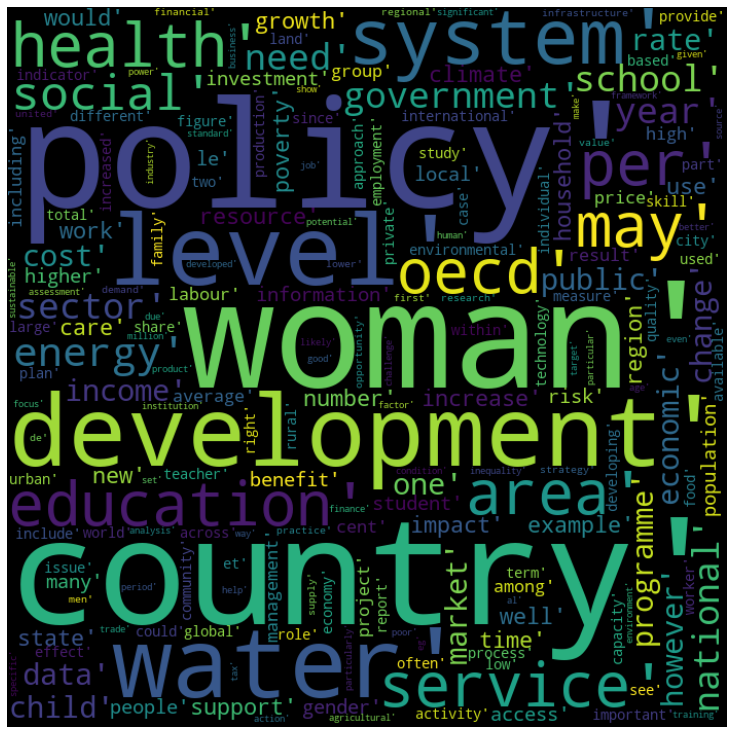

In [87]:
words = train['text']
allwords = []
for wordlist in words:
    allwords += wordlist
    
mostcommon = FreqDist(allwords).most_common(10000)
wordcloud = WordCloud(width=700, height=700, background_color=
                      'black').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 3.4 <a id="class_balance"><strong>Class Balance</strong></a>
[Table of Contents](#contents)

Text(0.5, 0, 'sdg')

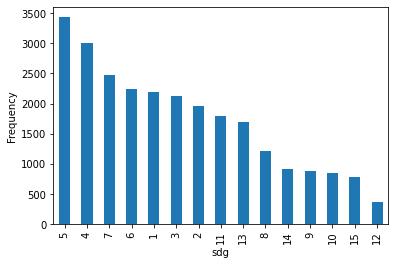

In [88]:
# plotting the class distribution
train.sdg.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('sdg')

From the distribution plot above, we can see that the class distribution has wide variations and it is very imbalance. Although, most sdg support the gender equality which is represented by `5` while we have a fewer responsibe consumption and production which is represented by `12`.

#### Dealing with data imbalance 

To deal with data imbalance and avoid bias predictions from the models we will build later on, we employed the resampling (Upsampling and Downsampling) method. 

In [89]:
train['text'] = train.text.apply(lambda x: ' '.join([str(i) for i in x])) #code to change from list to string

In [90]:
test['text'] = test.text.apply(lambda x: ' '.join([str(i) for i in x])) #code to change from list to string

dual-sampling:


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,SDG_Labels
19536,10.18356/8184a133-en,d0e05fe517b885fe0b9e70d813f7e654,current estimate drawn global exercise conduct...,1,2,7,0.555556,19537,No poverty


Class with their new resampled sizes


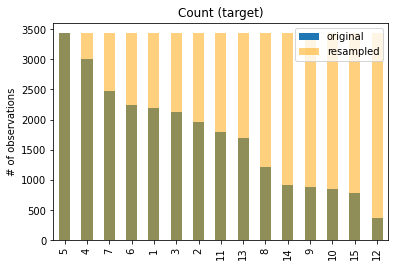

In [91]:
class_size = 3438 # setting an average or fixed size for each category in 'sdg'
dd = train.sdg.value_counts() # getting category name and their size
appended_data = [] # creating an empty list to append all category after resampling

# Creating a for-loop to resample and append to a list
for index, size in dd.items():
    if size < class_size: # setting condition to check if it's downsampling or otherwise
        temp_pd = resample(train[train['sdg']==index],
                          replace=True, # sample with replacement
                          n_samples=class_size, # match number in majority class
                          random_state=27)
    else:
        temp_pd = resample(train[train['sdg']==index],
                          replace=False, # sample with replacement (no need to duplicate observations)
                          n_samples=class_size, # match number in minority class
                          random_state=27)
# Appending each category after resampling
    appended_data.append(temp_pd)

# Creating a new dataframe and viewing
df_train_sampled = pd.concat(appended_data, axis=0)
print('dual-sampling:')
display(df_train_sampled.sample(1))
print('Class with their new resampled sizes')
# print(df_train_sampled.sdg.value_counts())

# ploting the old and new graph frequency
ax = train.sdg.value_counts().plot(kind='bar')
df_train_sampled.sdg.value_counts().plot(kind='bar', title='Count (target)', 
                                               ax=ax,color='orange', alpha=0.5)
plt.xticks(range(len(dd)),dd.index)
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

In [92]:
# Working with resampled data
train = df_train_sampled

## 3.5 <a id="feature_engineering"><strong>Feature Engineering</strong></a>
[Table of Contents](#contents)

### 3.4.1 Vectorization

At this point,we are using **CountVectorizer** function to convert the cleaned text to numerical entries in a matrix form

In [93]:
# converting each word in the dataset into features
vectorizer = CountVectorizer(analyzer = "word", max_features = 8000) 

we set the maximum feature to random number 8000 by discretion and to have a faster training of our model<br><br>

In [94]:
# transforming the cleaned text to numerical entries in a matrix form
reviews_vect = vectorizer.fit_transform(train['text'])

# converting the features to numpy array for fast fitting of our dataset
train_data_features = reviews_vect.toarray()

# checking the shape to be sure of the size of the features
print(f'Our new vectorized features have {train_data_features.shape[0]} rows and {train_data_features.shape[1]} feaures')

Our new vectorized features have 51570 rows and 8000 feaures


In [95]:
# Converting the word of the all text into features using 'vectorizer' object created earlier
reviews_vect_test = vectorizer.transform(test['text'])

In [96]:
# converting into a numpy array
test_data_features = reviews_vect_test.toarray() # for fast fitting of our dataset
test_data_features.shape # checking to be sure is the same size with our 'train' dataset

(6487, 8000)

In [97]:
#  Double checking our dataframe was modified rightly
test.sample(1)

,doi,text_id,text,labels_negative,labels_positive,agreement,id
2615,11.1002/pub/80d83f4c-en,165d2afc8bfb0c3f8a30d1ea94c4481d,geneva international telecommunication union c...,0,3,1.0,2616


<a id="six"></a>
# 4.0 <a id="model"><strong>Classification Models</strong></a>
[Table of Contents](#contents)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Classification Models ⚡ |
| :--------------------------- |
| In this section, we'll look at different models, try to explain them, and learn about their benefits and drawbacks. |

---

*  LinearSVC(Support Vector Classifier)<a id='svc'></a>
*  Naives Bayes
*  Logistic Regression
*  




### 8.1 Defining the independent (X) and dependent variables (y)

In [98]:
# setting the target and features 
y = np.array(train['sdg'])
X = train_data_features


### 8.2 Spliting into Train and validation set

Here, the train data set is divided into train and validation data set. The validation set size is 20% of the total records and it will be used in model evaluation.

In [99]:
# split the target ad features into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

Splitting of the dataset into train and validation dataset, so that we can train and also see the performance of the model on unseen dataset

## 4.1 <a id="modelpreprocessing"><strong>Model Preprocessing</strong></a>
[Table of Contents](#contents)

### 8.3.1 Defining function for building models

The function implements a machine learning moded with the use of the train_test_split concept. The function calculates various metrics to check for underfitting or overfitting and most importantly the performance of the model being executed.

In [100]:
sdgLables = {v: k for k, v in sdgLables.items()}

In [101]:
sdgLables = {'No poverty': 1, 'Zero Hunger': 2, 'Good Health and well-being': 3, 'Quality Education': 4, 'Gender equality': 5, 'Clean water and sanitation': 6, 'Affordable and clean energy': 7, 'Industry, Innovation and Infrustructure': 9,
             'Decent work and economic growth': 8, 'Reduced Inequality': 10, 'Climate Action': 13, 'Sustainable cites and communities': 11, 'Responsible consumption and production': 12, 'life below water': 14, 'Life on land': 15}


In [102]:
# careating a function to fit the model and calculate various metrics
def modelling(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_test)
    
# calculating the metrics
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred_valid,  average='weighted')
    cm = confusion_matrix(y_test, pred_valid)
    # sdgLables = {v: k for k, v in sdgLables.items()}
    cr = classification_report(y_test, pred_valid, target_names=sdgLables, output_dict=True)
    
# creating a dataframe for 'confusion matrix' and 'classification report'
    cm_df = pd.DataFrame(cm, index = sdgLables, columns = sdgLables)
    cr_df = pd.DataFrame(cr)
    
    print('Confusion Matrix')
    display(cm_df)
    print('Classification Report')
    display(cr_df)
    
# plotting the confusion matrix using heatmap
    plt.figure(figsize=(10,5))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print(f'Train accuracy(f1) is: {round(f1_train, 3)} and Validation accuracy(f1) is {round(f1_test, 3)}')
    return cm_df, cr_df, cm # returning metrics


### 8.3.2  Applying the modelling function to build models

### 4.2.1 <a id="model1"><strong>Model 1</strong></a>
[Table of Contents](#contents)

#### a) Logistic Regression Classifier

Logistics regression is a predictive analytics model that is used to describe data and explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.Sometimes, it can also be applied to a dependent variable that is multi-classed (ie have more than 2 variables). The model was adopted because it is a classification algorithm and suited our use case as well.

Confusion Matrix


,No poverty,Zero Hunger,Good Health and well-being,Quality Education,Gender equality,Clean water and sanitation,Affordable and clean energy,"Industry, Innovation and Infrustructure",Decent work and economic growth,Reduced Inequality,Climate Action,Sustainable cites and communities,Responsible consumption and production,life below water,Life on land
No poverty,941,8,7,7,47,2,4,18,6,26,11,0,4,0,1
Zero Hunger,17,1005,4,0,7,20,13,7,8,10,6,1,15,8,6
Good Health and well-being,14,5,1064,2,14,5,2,8,10,3,6,0,1,0,2
Quality Education,7,8,11,1029,25,5,7,24,6,10,7,3,2,3,1
Gender equality,59,11,25,27,906,5,8,44,20,30,8,5,3,3,3
Clean water and sanitation,2,17,4,3,11,1006,18,5,4,3,13,4,11,7,11
Affordable and clean energy,10,7,0,9,3,19,1009,5,12,4,10,3,16,3,4
"Industry, Innovation and Infrustructure",5,10,7,9,28,1,8,1043,6,7,5,1,3,0,2
Decent work and economic growth,2,4,1,4,2,2,5,5,1138,3,9,0,2,4,1
Reduced Inequality,3,0,3,3,4,0,2,5,10,1114,0,0,1,0,0


Classification Report


,No poverty,Zero Hunger,Good Health and well-being,Quality Education,Gender equality,Clean water and sanitation,Affordable and clean energy,"Industry, Innovation and Infrustructure",Decent work and economic growth,Reduced Inequality,Climate Action,Sustainable cites and communities,Responsible consumption and production,life below water,Life on land,accuracy,macro avg,weighted avg
precision,0.875349,0.912807,0.93662,0.931222,0.857955,0.906306,0.904122,0.889173,0.926710,0.906428,0.921514,0.980820,0.935169,0.974695,0.960438,0.921852,0.921288,0.921420
recall,0.869686,0.891748,0.93662,0.896341,0.783060,0.899017,0.905745,0.918943,0.962775,0.972926,0.895067,1.000000,0.921260,0.987622,0.983621,0.921852,0.921629,0.921852
f1-score,0.872508,0.902154,0.93662,0.913449,0.818798,0.902647,0.904933,0.903813,0.944398,0.938500,0.908098,0.990317,0.928162,0.981116,0.971891,0.921852,0.921160,0.921334
support,1082.000000,1127.000000,1136.00000,1148.000000,1157.000000,1119.000000,1114.000000,1135.000000,1182.000000,1145.000000,1115.000000,1125.000000,1143.000000,1131.000000,1160.000000,0.921852,17019.000000,17019.000000


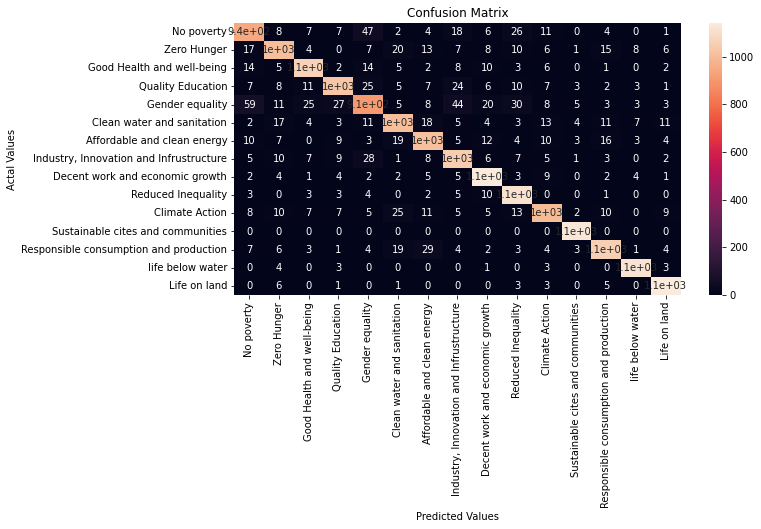

Train accuracy(f1) is: 1.0 and Validation accuracy(f1) is 0.921


In [103]:
# create logistic regression model instance
lm = LogisticRegression(C=2, solver='liblinear')

# fitting and predictiion by calling the 'modelling' fuction 
cm_df_logit, cr_df_logit, cm_logit = modelling(lm)

From the confusion matrix we can see that the model did well at predicting the `Gender equality`. Therefore, we have more correctly predicted `Gender equality` sentiment than others with an accuracy of `78%`

* Generally the model is overfitting having an accuracy score of `99%` in training vs `92%` while predicting unseen dataset


In [104]:
# Create dictionaries for the data we want to log on comet

params = {"random_state": 10,
          "model_type": "lm"
          }
metrics = {"f1": cr_df_logit.loc['f1-score', 'weighted avg'],
           "precision": cr_df_logit.loc['precision', 'weighted avg'],
           "recall": cr_df_logit.loc['recall', 'weighted avg']
           }

In [105]:
# Log our parameters and results on comet
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm_logit)

{'web': 'https://www.comet.com/api/asset/download?assetId=438f12b5d4094364a71878d9dfd98df3&experimentKey=c32c1e9de8a8456c9c31d47c69a46780',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=438f12b5d4094364a71878d9dfd98df3&experimentKey=c32c1e9de8a8456c9c31d47c69a46780',
 'assetId': '438f12b5d4094364a71878d9dfd98df3'}

### 4.2.2 <a id="model2"><strong>Model 2</strong></a>
[Table of Contents](#contents)

### b)  Decision Tree classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In order to make prediction, the algorithm simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees till it get to the final outcome.

In [106]:
#Inintiate Decision tree
dt=DecisionTreeClassifier(random_state=1)

#initiate a BaggingClassifier called bc consisting of 50 trees
bc=BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1, n_jobs=-1)

Confusion Matrix


,No poverty,Zero Hunger,Good Health and well-being,Quality Education,Gender equality,Clean water and sanitation,Affordable and clean energy,"Industry, Innovation and Infrustructure",Decent work and economic growth,Reduced Inequality,Climate Action,Sustainable cites and communities,Responsible consumption and production,life below water,Life on land
No poverty,875,21,17,17,37,7,5,34,4,28,19,4,9,1,4
Zero Hunger,28,965,0,4,8,23,17,6,13,9,21,7,13,5,8
Good Health and well-being,14,7,1018,16,32,5,3,7,7,8,10,3,2,2,2
Quality Education,24,4,12,963,30,3,7,58,10,14,12,3,7,0,1
Gender equality,76,10,62,43,773,15,14,64,25,21,21,9,13,4,7
Clean water and sanitation,5,25,8,3,11,953,29,2,5,1,20,8,17,7,25
Affordable and clean energy,8,11,4,5,5,15,964,7,11,10,17,13,32,4,8
"Industry, Innovation and Infrustructure",13,7,9,10,23,0,4,1009,6,28,9,1,6,6,4
Decent work and economic growth,2,4,0,6,5,3,17,6,1126,2,7,3,1,0,0
Reduced Inequality,3,0,4,6,3,0,4,2,7,1109,3,0,4,0,0


Classification Report


,No poverty,Zero Hunger,Good Health and well-being,Quality Education,Gender equality,Clean water and sanitation,Affordable and clean energy,"Industry, Innovation and Infrustructure",Decent work and economic growth,Reduced Inequality,Climate Action,Sustainable cites and communities,Responsible consumption and production,life below water,Life on land,accuracy,macro avg,weighted avg
precision,0.817757,0.896840,0.888307,0.881061,0.814542,0.890654,0.861483,0.827728,0.911003,0.890763,0.859445,0.941423,0.898946,0.971179,0.941715,0.887596,0.886190,0.886466
recall,0.808688,0.856256,0.896127,0.838850,0.668107,0.851653,0.865350,0.888987,0.952623,0.968559,0.860987,1.000000,0.895013,0.983201,0.975000,0.887596,0.887293,0.887596
f1-score,0.813197,0.876078,0.892200,0.859438,0.734093,0.870717,0.863412,0.857264,0.931348,0.928033,0.860215,0.969828,0.896975,0.977153,0.958069,0.887596,0.885868,0.886146
support,1082.000000,1127.000000,1136.000000,1148.000000,1157.000000,1119.000000,1114.000000,1135.000000,1182.000000,1145.000000,1115.000000,1125.000000,1143.000000,1131.000000,1160.000000,0.887596,17019.000000,17019.000000


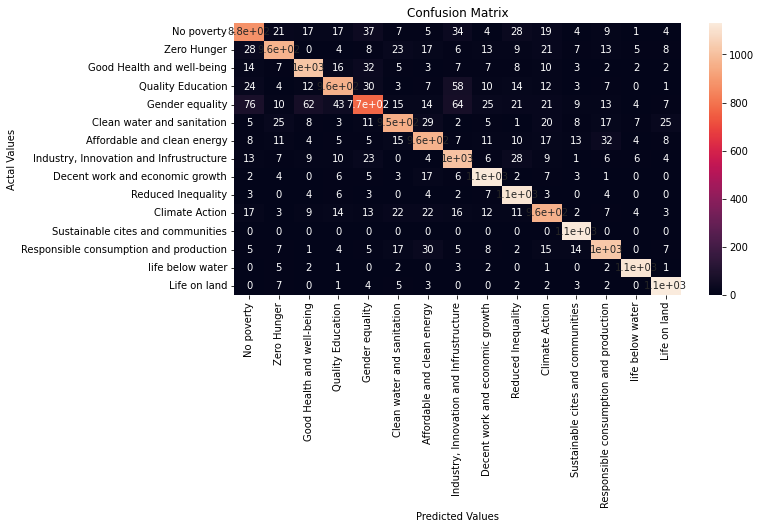

Train accuracy(f1) is: 1.0 and Validation accuracy(f1) is 0.886


In [107]:
cm_df_dt, cr_df_dt, cm_dt = modelling(dt)

From our result, the model performed poorly on unseen data. With the train data, an accuracy score of `100%` was recorded but on the test data, we have an accuracy score of `57.4%` which depicts overfitting. 

### Using pipeline

Moving forward to build the rest of our model, we employed techiques like `Pipeline` and `GridsearchCV`.

**Pipeline**

When it comes to orchestrating the flow of data into and output from a machine learning model, a machine learning pipeline comes in handy. It is known as an end-to-end structure that orchestrates the flow of data into and output from a machine learning model is known as a machine learning pipeline (or set of multiple models). It covers the input of the raw data, the features, the outputs, the machine learning model and model parameters, and the outputs of the predictions.

Here, a machine learning pipeline is employed to easy feature extraction from our text data. The pipeline employed executes the following steps in chronological order to extract these features and make predictions. They include:

* Count Vectorization: The CountVectorizer tool in Scikit-learn is used to turn a group of text documents into a vector of term/token counts. Additionally, it enables text data to be pre-processed before being turned into a vector form. Its capabilities turn it into a very versatile feature representation module for text.
&emsp;


* TF-ID Transformer: With TF-ID transformer, a count matrix is transformed into a normalised tf or tf-idf representation. To reduce the impact of tokens that appear often in a corpus, tf-idf is used in place of the raw frequencies of occurrence of a token in a specific document 



* Model: This represents the adopted Machine Learning model


**GridsearchCV**

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters and there is no way to know in advance the best values for hyperparameters. So ideally, we need to try all possible values to know the optimal values. That is why we employ GridSearchCV to automate the tuning of hyperparameters.

### 4.2.3 <a id="model3"><strong>Model 3</strong></a>
[Table of Contents](#contents)

### c) Naive Bayes classifier

Mostly employed in Natural Language Processing, the Multinomial Naive Bayes algorithm is a probabilistic learning technique (NLP). The method, which guesses the tag of a text such as an email or newspaper article, is based on the Bayes theorem. For a given sample, it determines the probabilities of each tag, and then outputs the tag with the highest probability.

The Naive Bayes classifier is a collection of many methods, all of which are based on the idea that each feature being classified is independent of every other feature. The existence or absence of one feature has no bearing on the other feature's existence or absence

In [108]:
# split the target and features into train and test
x_train, x_valid, y_train, y_valid = train_test_split(train['text'], train.sdg, test_size=0.33, random_state=10)

Here, we split our dataset again into `Train` and `Validation` set for the purpose of fitting the data into our pipeline

##### Building a pipeline to be more concise

In [109]:
# pipline with naive_bayes and using the 'clean_text' from dataset to fit the model
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])
# cross validation
scores = cross_validate(text_clf, train['text'], train.sdg, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,2.750437,0.560575,0.828195,0.864408
1,2.429465,0.568515,0.826062,0.860117
2,2.344625,0.552556,0.819760,0.863268
3,2.296858,0.532577,0.818402,0.863438
4,2.335961,0.552518,0.816172,0.864068


The model seem to be under performing and overfitting at the same time
- Using GridsearchCV we can find the best hyper-parameters

In [110]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
              'clf__alpha': (1e-2, 1e-3),
             'clf__fit_prior': (True, False)}
nb_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
nb_clf = nb_clf.fit(x_train, y_train)
display('The best accuracy is:',nb_clf.best_score_)
display(nb_clf.best_params_)

# predictions
predicts = nb_clf.predict(x_valid)
cm = confusion_matrix(y_valid,  predicts)
pd.DataFrame(cm, index = sdgLables, columns = sdgLables)

Using our split dataset so we can train on seen data and validate our model with the unseen dataset

In [ ]:
# Create dictionaries for the data we want to log
params = nb_clf.best_params_
metrics = {"f1": nb_clf.best_score_}

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm)

{'web': 'https://www.comet.com/api/asset/download?assetId=40acccef58f54abfb54e13c03d3d3b3c&experimentKey=10127e494d4d4bf9ac3bf2272b5f60f0',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=40acccef58f54abfb54e13c03d3d3b3c&experimentKey=10127e494d4d4bf9ac3bf2272b5f60f0',
 'assetId': '40acccef58f54abfb54e13c03d3d3b3c'}

### 4.2.4 <a id="model4"><strong>Model 3</strong></a>
[Table of Contents](#contents)

### d) K-Neighbors Classifier

Building a pipeline to be more concise

In [ ]:
# pipline with naive_bayes and using the 'clean_text' from dataset to fit the model
knc_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier()),])
# cross validation
scores = cross_validate(knc_clf, train['text'], train.sdg, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,2.431497,18.962607,0.802111,0.881583
1,2.154697,17.518312,0.804667,0.881111
2,2.299853,16.994346,0.802444,0.881694
3,2.074463,15.648122,0.803889,0.881444
4,1.944181,15.989112,0.788333,0.880167


The model seem to be under performing and overfitting at the same time
- Using GridsearchCV we can find the best hyper-parameters

In [ ]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__n_neighbors': (1, 31)}
knn_clf = GridSearchCV(knc_clf, parameters, n_jobs=-1)
knn_clf = knn_clf.fit(x_train, y_train)
display(f'The best accuracy is: {knn_clf.best_score_}')
display(knn_clf.best_params_)

# predictions
predicts = knn_clf.predict(x_valid)
cm = confusion_matrix(y_valid,  predicts)
pd.DataFrame(cm, index = sdgLables, columns = sdgLables)

'The best accuracy is: 0.8780431177446104'

{'clf__n_neighbors': 1, 'vect__ngram_range': (1, 2)}

,No poverty,Zero Hunger,Good Health and well-being,Quality Education,Gender equality,Clean water and sanitation,Affordable and clean energy,"Industry, Innovation and Infrustructure",Decent work and economic growth,Reduced Inequality,Climate Action,Sustainable cites and communities,Responsible consumption and production,life below water,Life on land
No poverty,849,9,11,8,22,1,2,15,8,25,7,0,6,2,7
Zero Hunger,20,872,0,3,7,5,7,3,12,3,6,5,18,10,9
Good Health and well-being,28,0,924,8,9,3,1,8,1,5,5,1,1,2,1
Quality Education,12,4,13,854,24,4,5,19,7,9,9,1,9,3,2
Gender equality,68,13,42,28,738,0,9,53,6,27,10,3,16,2,2
Clean water and sanitation,9,16,5,3,7,885,17,2,6,8,11,7,21,16,17
Affordable and clean energy,20,17,6,10,2,15,866,2,8,4,17,9,22,3,2
"Industry, Innovation and Infrustructure",16,6,9,20,16,3,3,886,4,14,8,3,1,0,2
Decent work and economic growth,7,7,2,3,2,2,1,2,948,3,5,0,9,0,3
Reduced Inequality,19,6,3,2,9,0,0,6,7,934,1,0,0,5,1


In [ ]:
# Create dictionaries for the data we want to log

params = knn_clf.best_params_
metrics = {"f1": knn_clf.best_score_}

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm)

{'web': 'https://www.comet.com/api/asset/download?assetId=93fdbee478e745c4b6cfbfdbd84f393e&experimentKey=10127e494d4d4bf9ac3bf2272b5f60f0',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=93fdbee478e745c4b6cfbfdbd84f393e&experimentKey=10127e494d4d4bf9ac3bf2272b5f60f0',
 'assetId': '93fdbee478e745c4b6cfbfdbd84f393e'}

The above cells are used to log/commit our model to comet 

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In order to evaluate how well our models have performed, we employed the following classification metrics:

* **1. Accuracy**

Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.

* **2. Precision**

Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives.

* **3. Recall**

Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive.

* **4. F1-Score**

It gives a combined idea about Precision and Recall metrics.F1 Score is the harmonic mean of precision and recall.

In [ ]:
from sklearn import metrics

In [ ]:
# Predicting with each model of choice
lm_preds = lm.predict(X_test) # LogisticRegression
nb_clf_preds = nb_clf.predict(x_valid) # Naive Bayes
knn_clf_preds = knn_clf.predict(x_valid)# K-Neighbors Classifier
dt_preds = dt.predict(X_test) # Decision Tree Classifier


In [ ]:
# creating a map for our model and there prediction array of values
metrics_dict = {"LogisticRegression":lm_preds, "Naive Bayes":nb_clf_preds, "K-Neighbors Classifier":knn_clf_preds,
                "Decision Tree Classifier": dt_preds}
metrics_list = [] #initiating a new list to store our metrics value temporarily

In [ ]:
# iterating through the dictionary to calculate metrics for each model and make a dataframe off it
for name, prediction in metrics_dict.items():
    f1_score = metrics.f1_score(y_valid, prediction, average="weighted")  
    precision = metrics.precision_score(y_valid, prediction, average="weighted")
    recall = metrics.recall_score(y_valid, prediction, average="weighted")
    metrics_list.append([name, f1_score, precision, recall])
perf_df = pd.DataFrame(metrics_list, columns=["Classifier", "F1_score", "Precision", "Recall"])
perf_df.set_index("Classifier", inplace=True)


In [ ]:
# overview of the dataframe created above
perf_df = perf_df.sort_values(by=['Population'], ascending=False)

,F1_score,Precision,Recall
Classifier,,,
LogisticRegression,0.904849,0.905563,0.905387
Naive Bayes,0.924984,0.925006,0.925051
K-Neighbors Classifier,0.898454,0.899467,0.899192
Decision Tree Classifier,0.861565,0.861713,0.862896


<AxesSubplot:xlabel='Classifier'>

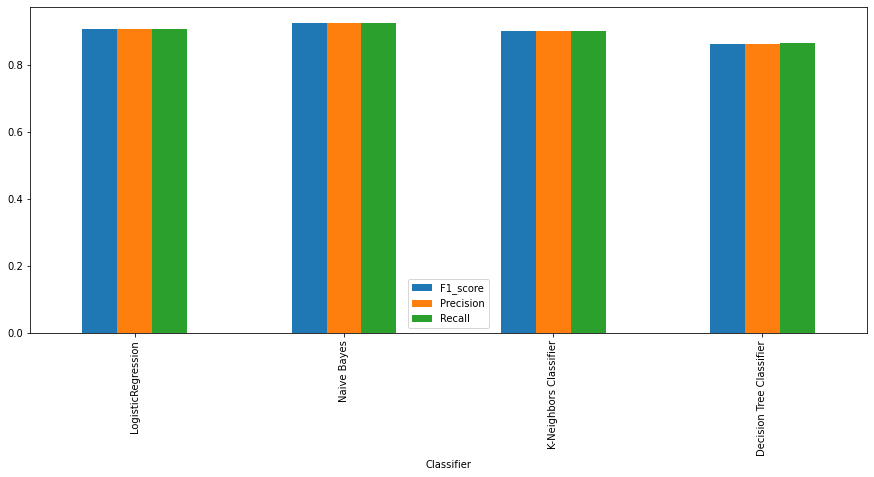

In [ ]:
# plotting the metrics complied 
perf_df.plot(kind="bar", figsize=(15,6))

All the Classification metrics point to `Naive Bayes` as the better Model


#### predicting our `test` DataSet with the best model

In [ ]:
# Naive bayes 
# Using the fitted (train) model to predict the 'test' dataset
pred_test = nb_clf.predict(test['text'])

In [ ]:
# Saving test predictions to csv file
output = pd.DataFrame({'id': test.id,
                       'sdg': pred_test})
output.to_csv('Team A.csv', index=False)

# 5.0 <a id="Conclusion/Recommendation"><strong>CONCLUSION AND RECOMMENDATION</strong></a>
[Table of Contents](#contents)

## 5.1 <a id="Conclusion"><strong>Conclusion</strong></a>
[Table of Contents](#contents)

## 5.2 <a id="Recommendation"><strong>Recommendation</strong></a>
[Table of Contents](#contents)

# 6.0 <a id="reference"><strong>REFERENCES</strong></a>
[Table of Contents](#contents)